In [1]:
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

In [19]:
# Open the file
with open('sys_npt.lammpstrj', 'r') as f:
    data = f.readlines()
n_atoms = int(data[3].strip()) # Total number of atoms in the system
print(n_atoms)

512


In [20]:
# Helper function to return a list of coordinates for the
# frame of interest. `start` and `end` variables are the line
# numbers to read.

def get_cordinates_for_frame(data, start, end):
    coordinates = []
    for l in data[start: end+1]:
        s = l.split()
#         try:
#             if int(s[1]) == 2: # Get only oxygen atoms
        coordinates.append([float(s[2]), float(s[3]), float(s[4])])
#         except:
#             continue
    return coordinates

In [21]:
# Helper function to calculate the distance between atoms
# keeping in mind the boundary conditions

def distance_between_points(p, q):
    distance_x = abs(p[0] - q[0])
    distance_x = min(distance_x, abs(box_size - distance_x))
    distance_y = abs(p[1] - q[1])
    distance_y = min(distance_y, abs(box_size - distance_y))
    distance_z = abs(p[2] - q[2])
    distance_z = min(distance_z, abs(box_size - distance_z))
    
    return np.lib.scimath.sqrt(distance_x**2 + distance_y**2 + distance_z**2)

In [22]:
# Initialise the calculation

n_bins = 200
n_frames = 4000
box_size = 62
increment = box_size / (2 * n_bins)
r_cut = box_size / 2 #r_cut value can be changed accordingly

In [ ]:
# Loop over all the frames and for each frame and find the distribution of distances

distribution = np.zeros(n_bins)

for k in range(n_frames):
    start = k*n_atoms + (k+1)*9
    print(start)
    end = start + n_atoms
    print(end)
    coordinates = []
    coordinates = get_cordinates_for_frame(data, start, end-1)
    n_particles = len(coordinates)
    print(n_particles)
    for i in range(n_particles-1):
        for j in range(i+1, n_particles):
            distance = distance_between_points(coordinates[i], coordinates[j])
            if distance < (r_cut):
                ig = int(distance / increment)
                distribution[ig] = distribution[ig] + 2

9
521
512
530
1042
512
1051
1563
512
1572
2084
512
2093
2605
512
2614
3126
512
3135
3647
512
3656
4168
512
4177
4689
512
4698
5210
512
5219
5731
512
5740
6252
512
6261
6773
512
6782
7294
512
7303
7815
512
7824
8336
512
8345
8857
512
8866
9378
512
9387
9899
512
9908
10420
512
10429
10941
512
10950
11462
512
11471
11983
512
11992
12504
512
12513
13025
512
13034
13546
512
13555
14067
512
14076
14588
512
14597
15109
512
15118
15630
512
15639
16151
512
16160
16672
512
16681
17193
512
17202
17714
512
17723
18235
512
18244
18756
512
18765
19277
512
19286
19798
512
19807
20319
512
20328
20840
512
20849
21361
512
21370
21882
512
21891
22403
512
22412
22924
512
22933
23445
512
23454
23966
512
23975
24487
512
24496
25008
512
25017
25529
512
25538
26050
512
26059
26571
512
26580
27092
512
27101
27613
512
27622
28134
512
28143
28655
512
28664
29176
512
29185
29697
512
29706
30218
512
30227
30739
512
30748
31260
512
31269
31781
512
31790
32302
512
32311
32823
512
32832
33344
512
33353
33865
512
3387

In [ ]:
# Calculate g(r) by normalising the distribution
for j in range(n_bins):
    distribution[j] = distribution[j]/(n_frames*n_particles)

density = n_particles/box_size**3
for j in range(n_bins):
    r1 = j * increment
    r2 = r1 + increment
    vol_bin = (4/3) * sp.pi * (r2**3 - r1**3)
    n_ideal = vol_bin * density
    distribution[j] = distribution[j] / (n_ideal)
    
print(distribution)

In [ ]:
radii = np.linspace(0.0, n_bins*increment, n_bins)
plt.xlabel('r (Å)')
plt.ylabel('g$_{O-O}$(r)')
plt.plot(radii, distribution)
plt.show()

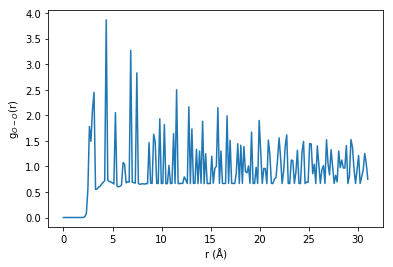

In [30]:
# for r_cut = box_size/2
radii = np.linspace(0.0, n_bins*increment, n_bins)
plt.xlabel('r (Å)')
plt.ylabel('g$_{O-O}$(r)')
plt.plot(radii, distribution)
plt.show()